In [ ]:
# linear equation model

In [1]:
pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [2]:
pip install pickle 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn pickle-mixin

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.0/11.1 MB 393.8 kB/s eta 0:00:29
   ---------------------------------------- 0.1/11.1 MB 550.5 kB/s eta 0:00:21
   ---------------------------------------- 0.1/11.1 MB 585.1 kB/s eta 0:00:19
   ---------------------------------------- 0.1/11.1 MB 547.6 kB/s eta 0:00:21
    --------------------------------------- 0.2/11.1 MB 551.6 kB/s eta 0:00:20
    --------------------------------------- 0.2/11.1 MB 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
Warnings.filterwarnings('ignore')

NameError: name 'Warnings' is not defined

In [9]:
import sklearn
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [14]:
dataset = pd.read_csv('salary_data.csv')   

In [15]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [16]:
x = dataset.drop(columns='Salary')
y = dataset['Salary']

In [17]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [18]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
x_test

,YearsExperience
5,2.9
0,1.1
16,5.1
18,5.9
13,4.1
27,9.6


In [21]:
y_test

5      56642.0
0      39343.0
16     66029.0
18     81363.0
13     57081.0
27    112635.0
Name: Salary, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [23]:
y_predict = regression.predict(x_test)
y_predict

array([ 53385.40589435,  36129.34917809,  74476.1418809 ,  82145.50042147,
        64889.4437052 , 117616.28367157])

In [24]:
regression.predict([[10]])

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([121450.96294185])

In [25]:
x_train_array = np.array(x_train['YearsExperience'])
x_train_array

array([ 8.7,  2.2,  7.9,  5.3,  3. ,  4.5,  6.8,  3.2,  8.2, 10.5,  4.9,
        9.5,  3.9,  4. ,  3.2,  3.7,  2. , 10.3,  7.1,  9. ,  6. ,  1.5,
        1.3,  4. ])

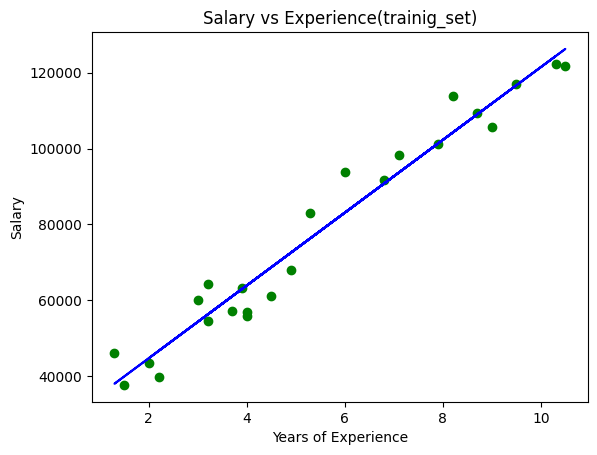

In [26]:
plt.scatter(x_train_array, y_train, color='g')
plt.plot(x_train, regression.predict(x_train), color='b')
plt.title('Salary vs Experience(trainig_set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [27]:
x_test_array = np.array(x_test['YearsExperience'])
x_test_array

array([2.9, 1.1, 5.1, 5.9, 4.1, 9.6])

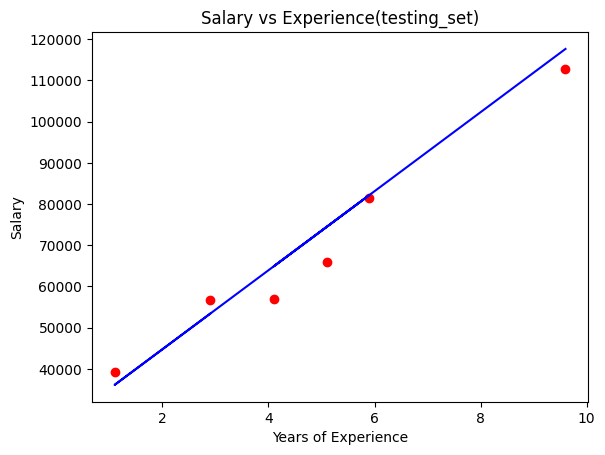

In [28]:
plt.scatter(x_test_array, y_test, color='red')
plt.plot(x_test, regression.predict(x_test), color='b')
plt.title('Salary vs Experience(testing_set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error


In [30]:
mean_absolute_error(y_test, y_predict)

4748.269101115765

In [31]:
r2_score(y_test, y_predict)

0.9448482162408025

In [32]:
p = np.array([[15]])

In [33]:
y_predict = regression.predict(p)
y_predict

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([169384.45382037])

In [34]:
pickle.dump(regression, open('simple linear regression model.pkl', 'wb'))